In [3]:
# -------------------- Imports -------------------- #
from keras.models import Sequential
from keras.layers import Dense
import numpy as np, pandas as pd, os
from prettytable import PrettyTable
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [4]:
# -------------------- Globals and Configs -------------------- #
feature_names = list()
for index in range(1, 6):
    feature_names.extend(["Suit"+str(index), "Rank"+str(index)])

feature_names.append('class')


training_input_file = os.path.abspath('../data/csv/train.csv')
testing_input_file = os.path.abspath('../data/csv/test.csv')

np.random.seed(666)     # seed for reproducible results

# To store configs
class myConfigs:
    features = 0
    classes = 0


config = myConfigs()

In [5]:
# -------------------- Data -------------------- #

train_data = pd.read_csv(training_input_file, names=feature_names)
test_data = pd.read_csv(testing_input_file, names=feature_names)

# Get features of data
config.features = len(train_data.columns) - 1
config.classes = len(set(train_data['class']))

# Shuffle training data
train_data = train_data.sample(frac=1).reset_index(drop=True)

# Seperate data and classes
train_y = np.array(train_data['class'])
train_x = np.array(train_data.drop('class', 1))

test_y = np.array(test_data['class'])
test_x = np.array(test_data.drop('class', 1))

tab = PrettyTable(['Config', 'Value'])
configs = vars(config)

for key in configs:
    tab.add_row([key, configs[key]])
print(tab)

print("Instances in training data :", len(train_data))
print("Instances in testing data :", len(test_data))

+----------+-------+
|  Config  | Value |
+----------+-------+
| features |   10  |
| classes  |   10  |
+----------+-------+
Instances in training data : 25010
Instances in testing data : 1000000


In [6]:
# -------------------- Model -------------------- #
model = Sequential()

# Input layer
model.add(Dense(config.features, input_dim = train_x.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(config.features//2 , activation='relu'))
model.add(Dense(config.features//2 , activation='relu'))

# Output layer
model.add(Dense(1, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_x, train_y, epochs = 500, batch_size = 500, verbose=0)

In [14]:
scores = model.evaluate(train_x, train_y)
print("Train =", model.metrics_names[1], scores[1] * 100)

scores = model.evaluate(test_x, test_y)
print("Test =", model.metrics_names[1], scores[1] * 100)

25010/25010 [==============================] - 0s 19us/step
Train = acc 42.37904838088606
1000000/1000000 [==============================] - 16s 16us/step
Test = acc 42.2498


In [7]:
train_accuracies = list()
test_accuracies = list()

for iterations in range(50, 500, 50):
    model.fit(train_x, train_y, epochs = iterations, batch_size = 500, verbose=0)
    scores = model.evaluate(train_x, train_y, verbose=0)
    train_accuracies.append(scores[1]* 100)
    scores = model.evaluate(test_x, test_y, verbose=0)
    test_accuracies.append(scores[1]* 100)

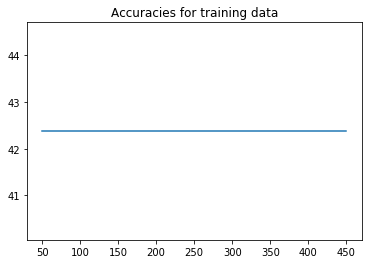

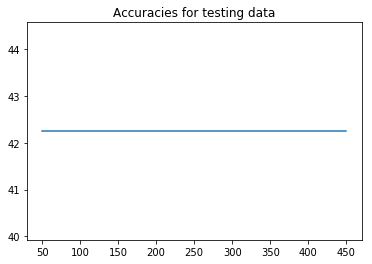

In [8]:
plt.title('Accuracies for training data')
plt.plot(range(50, 500, 50), train_accuracies)
plt.show()
plt.title('Accuracies for testing data')
plt.plot(range(50, 500, 50), test_accuracies)
plt.show()